# Exemplo de classificação supervisionada com Árvore de decisão usando Python
- Predição sobre a realização de empréstimo

## Importação das bibliotecas e da base de dados

In [25]:
from google.colab import files
files.upload()

{}

In [26]:
import pandas as pd
dados= pd.read_csv('emprestimo_alto_baixo.csv', sep=',')

In [27]:
#outras bibliotecas necessárias
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

### Visualização os atributos e tipos de dados de cada um



In [28]:
print(dados.dtypes)
print(dados)

renda_mensal     int64
divida_total     int64
idade            int64
risco           object
dtype: object
    renda_mensal  divida_total  idade  risco
0           5000         20000      1   ALTO
1           3500         21000      2   ALTO
2           5500          6000      3  BAIXO
3           3000         30000      1   ALTO
4           1500          8000      2   ALTO
5            800          6000      2   ALTO
6           4500          3000      2  BAIXO
7           8000          7500      2  BAIXO
8           9000         12000      3   ALTO
9          10500         20000      1  BAIXO
10         21000         35000      3   ALTO
11          8700         11000      1  BAIXO
12         11500         30000      1   ALTO
13         10400         15000      1  BAIXO
14          2000          6000      2   ALTO
15          3000         15000      2   ALTO
16          5500         12000      3   ALTO
17          3000          4000      1   ALTO
18         12000         20000      2  

## Limpeza e pré-processamento dos dados
- Verifica a existência de valores nulos.


In [29]:
dados.isnull().sum()

renda_mensal    0
divida_total    0
idade           0
risco           0
dtype: int64

## Aplicação do método de Árvore de decisão


### Definição dos atributos para treinamento e classe
- São definidos os parâmetros do classificador baseado em AD
- O número de atributos é contado, retirando o de classe
- Posteriormente é armazenada a lista dos valores sem a classe
- X recebe os valores dos atributos e y os valores da classe


In [30]:
# Cria o objeto da classe que será treinada
classificador_tree = tree.DecisionTreeClassifier(random_state=1)

# Usando todos os atributos
numatributos = len(dados.columns) - 1
atributos = list(dados.columns[0:numatributos]) 

# Selecionando alguns atributos
#atributos = ['Renda mensal', "Divida total', 'Idade']

X = dados[atributos]
y = dados['risco']

#print(numatributos)
#print(atributos)

print(X)
print(y)

    renda_mensal  divida_total  idade
0           5000         20000      1
1           3500         21000      2
2           5500          6000      3
3           3000         30000      1
4           1500          8000      2
5            800          6000      2
6           4500          3000      2
7           8000          7500      2
8           9000         12000      3
9          10500         20000      1
10         21000         35000      3
11          8700         11000      1
12         11500         30000      1
13         10400         15000      1
14          2000          6000      2
15          3000         15000      2
16          5500         12000      3
17          3000          4000      1
18         12000         20000      2
19          1100         15000      1
20          4500          3000      3
21         12000          8000      2
22          9000         14000      3
23         10500          8500      2
24          8500         11000      3
25          

In [32]:
# Separação em dois conjuntos: treinamento e teste
from sklearn.model_selection import train_test_split  
treinamento_x, validacao_x, treinamento_y, validacao_y = train_test_split(X, y, test_size = 0.20)

print(treinamento_x)
print(treinamento_y)

    renda_mensal  divida_total  idade
1           3500         21000      2
22          9000         14000      3
8           9000         12000      3
20          4500          3000      3
39         18900         11000      2
27         10400         16000      2
24          8500         11000      3
19          1100         15000      1
18         12000         20000      2
21         12000          8000      2
13         10400         15000      1
37         17000          8000      2
9          10500         20000      1
11          8700         11000      1
26         11500         15000      3
15          3000         15000      2
0           5000         20000      1
14          2000          6000      2
30         21000         25000      3
36          2700          1300      2
28          9500          8300      2
12         11500         30000      1
33         14200          9000      1
2           5500          6000      3
32         10800          6000      2
31         1

### Processo de aprendizado
-  Efetua o aprendizado e posteriormente uma validação cruzada usando K-fold de 10.
- Mostra a matriz de confusão

In [33]:
resultado = classificador_tree.fit(treinamento_x, treinamento_y)

predicted = cross_val_predict(classificador_tree, treinamento_x, treinamento_y, cv=10)

expected = treinamento_y.values

print(confusion_matrix(expected, predicted))

#print("Esperado:\n")
#print(expected)
#print("Previsto:\n")
#print(predicted)

from sklearn.metrics import accuracy_score
print(classification_report(expected, predicted))
print(accuracy_score(expected, predicted))

[[13  3]
 [ 3 13]]
              precision    recall  f1-score   support

        ALTO       0.81      0.81      0.81        16
       BAIXO       0.81      0.81      0.81        16

    accuracy                           0.81        32
   macro avg       0.81      0.81      0.81        32
weighted avg       0.81      0.81      0.81        32

0.8125


In [35]:
# Problema de classes desbalanceadas
dados.groupby(dados['risco']).size()

risco
ALTO     24
BAIXO    16
dtype: int64

### Validação em outro conjunto de dados
- Usa o conjunto teste/validação

In [36]:
predicted = classificador_tree.predict(validacao_x)
expected = validacao_y.values

print(confusion_matrix(expected, predicted))

#print("\nEsperado:\n")
#print(expected)
#print("Previsto:\n")
#print(predicted)

print(classification_report(expected, predicted))
print(accuracy_score(expected, predicted))

[[6 2]
 [0 0]]
              precision    recall  f1-score   support

        ALTO       1.00      0.75      0.86         8
       BAIXO       0.00      0.00      0.00         0

    accuracy                           0.75         8
   macro avg       0.50      0.38      0.43         8
weighted avg       1.00      0.75      0.86         8

0.75


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


risco


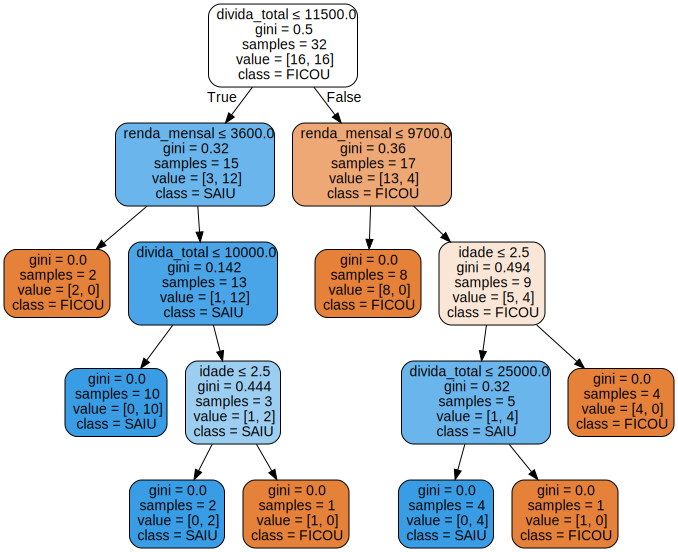

In [37]:
#tree.plot_tree(classificador_tree, feature_names=True)
print(y.name)
import graphviz 
dot_data = tree.export_graphviz(classificador_tree, out_file=None, feature_names=atributos, class_names=['FICOU', 'SAIU'],filled=True, rounded=True, special_characters=True)  
#tree.export_graphviz()
graph = graphviz.Source(dot_data)  
graph 

In [38]:
# Visualizar as features mais importantes
print(classificador_tree.feature_importances_)
for feature,importancia in zip(atributos,classificador_tree.feature_importances_):
    print("{}:{}".format(feature, importancia))

[0.28919055 0.44969834 0.26111111]
renda_mensal:0.2891905480140774
divida_total:0.4496983408748115
idade:0.2611111111111111
